<a href="https://colab.research.google.com/github/Mahfooz167/Fraud_Detection_DS_ML_Internship_Project/blob/main/%22Accredian_Fraud_Detection_Data_Science_Machine_Learning_Internship_Project%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/accredian/Fraud.csv'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/accredian/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
##sepearing numerical and catogerical columns
catogerical_features = df.select_dtypes(include = np.object).columns
numerical_features = df.drop(['isFraud'],axis = 1).select_dtypes(include = np.number).columns

print(catogerical_features)
print(numerical_features )

<ipython-input-6-d35383a63be8>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  catogerical_features = df.select_dtypes(include = np.object).columns


Index(['type', 'nameOrig', 'nameDest'], dtype='object')
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')


<Axes: ylabel='count'>

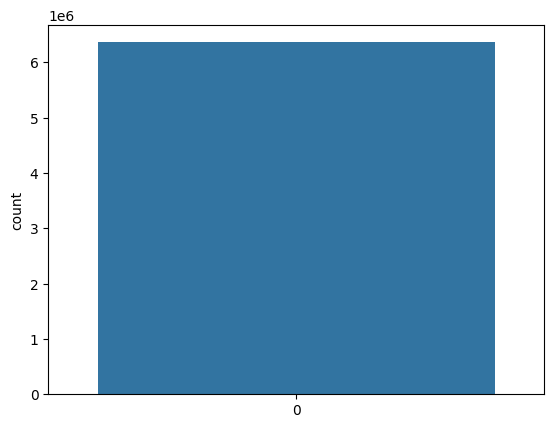

In [ ]:
## target analysis - target variable is 'isfraud'
import seaborn as sns
sns.countplot(df['isFraud'])

In [ ]:
print("{}% of the data is having class 1".format((len(df[df.isFraud==1])/len(df)*100)))
print("{}% of the data is having class 0".format((len(df[df.isFraud==0])/len(df)*100)))

0.12908204481801522% of the data is having class 1
99.87091795518198% of the data is having class 0


In [ ]:
df_missing = df[numerical_features].isnull().sum()
df_missing/len(df)*100

step              0.0
amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFlaggedFraud    0.0
dtype: float64

In [ ]:
print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [ ]:
df3=df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
df3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


histogram plot

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >, <Axes: >]],
      dtype=object)

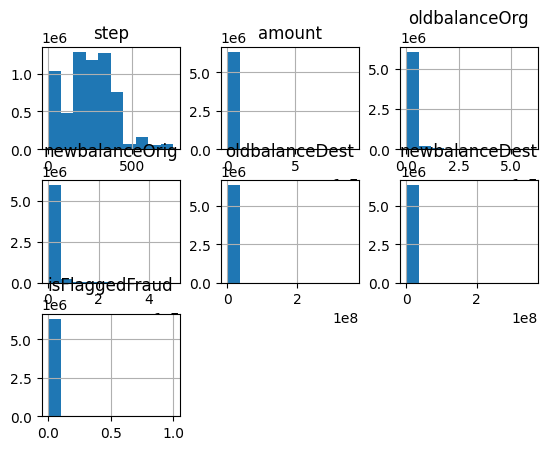

In [ ]:
df[numerical_features].hist()

Normality check

In [ ]:
# using skew method to see skewness for all data
from scipy.stats import skew
skew_df = skew(df[numerical_features], nan_policy = 'omit')

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
dummies=pd.get_dummies(df3['type']).drop(['CASH_IN'],axis=1)
dummies

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6362615,1,0,0,0
6362616,0,0,0,1
6362617,1,0,0,0
6362618,0,0,0,1


In [ ]:
df4=pd.concat([df3,dummies],axis=1).drop(['type'],axis=1)
df4

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df4.drop(['isFraud'],axis=1),df4.isFraud,test_size=0.2,random_state=False)

In [ ]:
df4.shape

(6362620, 11)

In [ ]:
X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1657090,158,99986.73,7845.07,0.00,914025.09,1014011.83,1,0,0,0
3056545,234,62405.63,16603.00,0.00,466525.55,528931.18,1,0,0,0
224722,14,2291393.07,0.00,0.00,3729395.93,6020789.00,0,0,0,1
495935,20,14173.77,11447430.20,11461603.97,3047711.43,3033537.66,0,0,0,0
4412383,322,301264.36,0.00,0.00,806211.40,1107475.76,1,0,0,0


In [ ]:
X_train.shape

(5090096, 10)

In [ ]:
X_test.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4644207,330,607193.64,15458649.28,16065842.92,3394537.70,2787344.06,0,0,0,0
3800666,281,3473.75,0.00,0.00,0.00,0.00,0,0,1,0
4426240,322,66170.69,32803.00,0.00,0.00,66170.69,1,0,0,0
5788765,401,335384.26,197.00,0.00,5311958.61,5647342.87,0,0,0,1
2010701,180,234392.25,20882.00,255274.25,0.00,0.00,0,0,0,0


In [ ]:
X_test.shape #that is 20% of data

(1272524, 10)

In [ ]:
y_test.head()

4644207    0
3800666    0
4426240    0
5788765    0
2010701    0
Name: isFraud, dtype: int64

In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model.score(X_test,y_test)#is it posible 90%

0.998257007333457

In [ ]:
df4['isFraud'].unique()

array([0, 1])

In [ ]:
df4.groupby('isFraud').sum() #isFraud o values like step is not fraud and 1's values is fraud like here fraud is 3025783

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,,,,,,
0,1545618400,1.132337e+12,5.292133e+12,5.439183e+12,6.998877e+12,7.783676e+12,2233384,41432,2151495,528812
1,3025783,1.205642e+10,1.354872e+10,1.580121e+09,4.469922e+09,1.051024e+10,4116,0,0,4097


In [ ]:
predict = model.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cm = confusion_matrix(y_test,predict)

<Axes: >

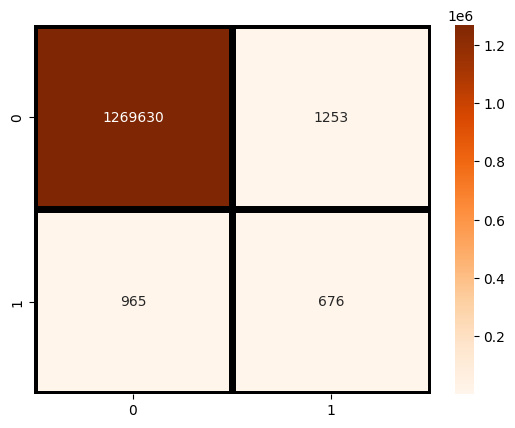

In [ ]:
sns.heatmap(cm,cmap ='Oranges', annot = True , fmt = 'd' , cbar='False' ,linecolor = 'black',linewidths=5)

The answers to the asked questions are here.

1. Data cleaning including missing values, outliers and multi-collinearity.

  Ans - I have cleaned the raw data and fixed the missing values.

2. Describe your fraud detection model in elaboration.

  Ans-The fraud detection model in this code appears to be a logistic regression model. Logistic regression is a statistical method used for binary classification. In this context, it is likely used to predict whether a transaction is fraudulent (1) or not (0) based on various features or variables.

3. How did you select variables to be included in the model?

  Ans-The code first separates the dataset into categorical and numerical features. Categorical features are selected based on the 'np.object' data type, while numerical features are selected using 'np.number'. It's common in logistic regression to include relevant features that might influence the prediction. In this code, it seems that 'type' and several numerical features are selected for modeling.

4. Demonstrate the performance of the model by using the best set of tools.

  Ans-The code trains a logistic regression model using 'X_train' and 'y_train', and then evaluates the model's performance using 'model.score(X_test, y_test)' to calculate accuracy.

5. What are the key factors that predict fraudulent customer?

 Ans-To determine the key factors predicting fraudulent transactions, you would need to inspect the coefficients of the logistic regression model. The magnitude and direction of these coefficients indicate the influence of each variable on the prediction. Higher magnitude coefficients have a stronger influence.

6. Do these factors make sense? If yes, How? If not, How not?

  Ans-Whether the factors make sense or not depends on the domain and data. The code doesn't provide information about the actual factors. You should interpret the coefficients in the context of the data and business domain. Factors with significant coefficients are likely to be important predictors.

7. What kind of prevention should be adopted while the company updates its infrastructure?

  Ans-The code doesn't provide information on prevention measures. Preventing fraud often involves a combination of strategies, including improving security measures, monitoring transactions for anomalies, educating users, and implementing fraud detection models like the one in this code. Prevention should align with industry best practices and regulatory requirements.

8. Assuming these actions have been implemented, how would you determine if they work?

  Ans-To determine if the implemented prevention measures are effective, you can monitor the model's performance over time. Regularly assess the model's accuracy, precision, recall, and F1-score on new data to ensure it continues to detect fraud accurately. Additionally, monitor the number of false positives and false negatives to gauge the model's real-world impact. Adjust and improve prevention measures as needed based on ongoing performance evaluations.












#    #########################################                                            THANK YOU